# Intro

We said an intelligent agent takes perceptual history and converts to action

```
Percepts -> actions
```

Planning helps in action selection. 

## Propositional Logic

| Description | P Logic | 
| --- | --- |
| Robot has to paint the ceiling | Painted(Ceiling) |
| Robot has to paint the ladder | Painted(Ladder) |
| Conjunction | Painted(Ceiling) & Painted(Ladder) |

## States

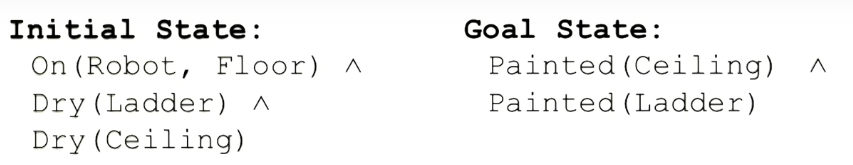

## Exercise

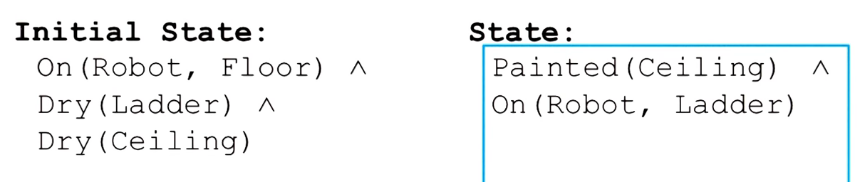

## Operator

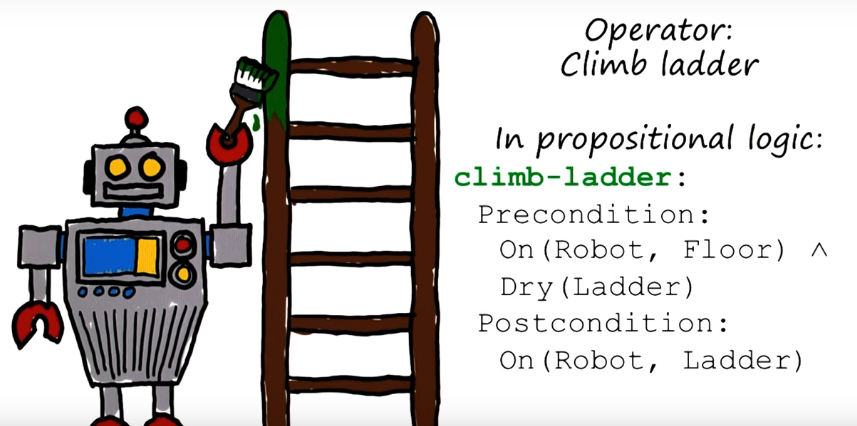

* By convention, **precondition has all literals positive**, **postcondition may have negative literals**
* precondtion results **are true** in world before operator applied
* postcondition results **will become true** in world after operator applied
* operator can be **applied only if precondition is true**

## Exercise

**descend-ladder** 
precondition:  Robot should be already on Ladder, and Ladder should be dry
postcondition: Robot is on floor

**paint-ceiling** 
pre: Robot should be on Ladder, Ladder is dry, and Ceiling is also dry
post: ceiling painted and not dry anymore

**paint-ladder**
pre: Robot should be on Floor and ladder dry
post: ladder painted and not dry anymore

Correct answer:
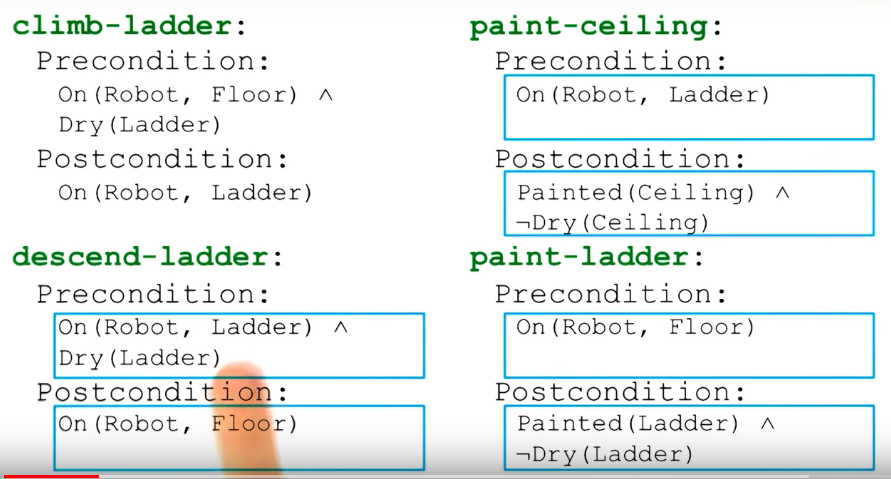

<font color='red'><b>Make sure to correct to have only positive literals in pre conditions</b></font>

## Planning and State Spaces

Note how states where the operator is applied satisfies both pre and post condition (and that is why that operator was selected in first place). Also note statse have negative literals, while operator preconditions do not. 

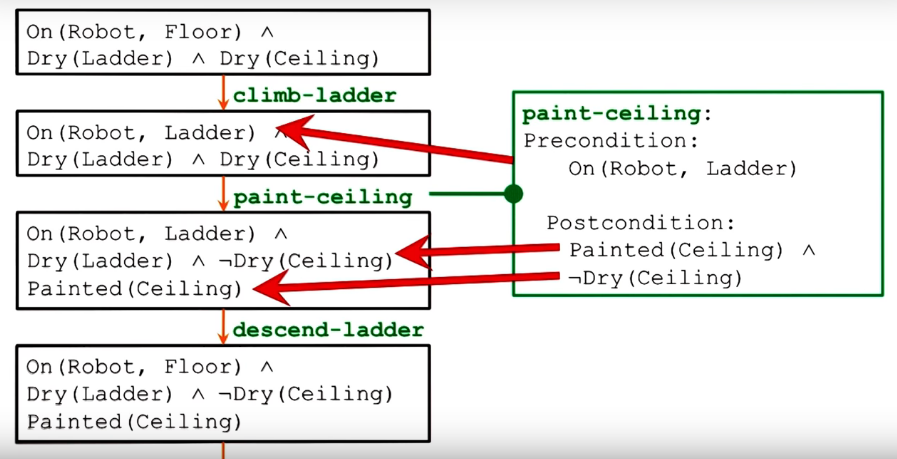

## MEA problem

### Step 1

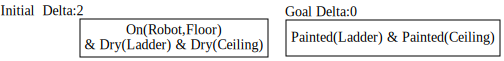

In [1]:
import graphviz as gz

G = '''
digraph {
    rankdir=TD;
    A[shape="box",label="On(Robot,Floor) \n& Dry(Ladder) & Dry(Ceiling)", xlabel="Initial  Delta:2"]
    B[shape="box",label="Painted(Ladder) & Painted(Ceiling)", xlabel="Goal Delta:0"]
}
'''
gz.Source(G)

**Current State:** on which operators should be applied next

| Current State | 
| --- |
| On(Robot, Floor) & Dry(Ladder) & Dry(Ceiling)

**Available Operators**  

| Operator | Pre condition | Post Condition | 
| --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) 
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) 
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) 

**Applicable Operators:** If not applicable, can be down right rejected anyway. 

| Operator | Pre condition | Post Condition | Applicability | Why?
| --- | --- | --- | --- | --- |
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) | yes | pre condition satisfied
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) | no | pre condition not satisfied
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) | no | pre condition not satisfied
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) | yes | pre condition satisfied

**Delta:** For those applicable, which ever has least delta should be chosen

| Operator | Current State | Post Condition | Next State | Delta | 
| --- | --- | --- | --- | --- |
| climb-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling)| On(Robot, Ladder)| On(Robot, Ladder) & Dry(Ladder) <br>& Dry(Ceiling) | 2  
| paint-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling) | Painted(Ladder) & !Dry(Ladder) | On(Robot, Floor) & !Dry(Ladder) <br>& Dry(Ceiling) & Painted(Ladder) | 1 

So ```paint-ladder``` is best choice as per MEA at this step

### Step 2

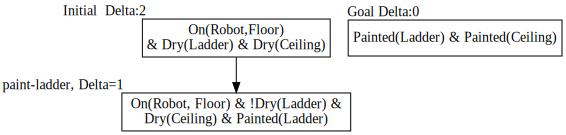

In [2]:
G = '''
digraph {
    rankdir=TD;
    A[shape="box",label="On(Robot,Floor) \n& Dry(Ladder) & Dry(Ceiling)", xlabel="Initial  Delta:2"]
    B[shape="box",label="Painted(Ladder) & Painted(Ceiling)", xlabel="Goal Delta:0"]
    C[shape="box", label="On(Robot, Floor) & !Dry(Ladder) & \nDry(Ceiling) & Painted(Ladder)", xlabel="paint-ladder, Delta=1"]
    A -> C
}
'''
gz.Source(G)

**Current State:** 

| Current State | 
| --- |
| On(Robot, Floor) & !Dry(Ladder) & Dry(Ceiling) & Painted(Ladder)

**Available Operators**  

| Operator | Pre condition | Post Condition | 
| --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) 
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) 
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) 

**Applicable Operators:** Based on satisfying pre condition..

| Operator | Pre condition | Post Condition | Applicability 
| --- | --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) | No 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) | No 
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) | No
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) | yes 

MEA according to me is stuck in a conflict of painting again and again. 

## Exercise: Partial Order Planning


### Sample

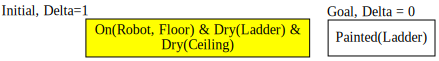

In [3]:
# Initial State
I1 = 'On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = 'Initial, Delta=1'

# Goal State
G1 = 'Painted(Ladder)'
G2 = 'Goal, Delta = 0'

G = """
digraph {{
    rankdir=TD
    A[shape="box",label="{0}", xlabel="{1}", style="filled", fillcolor="yellow"]
    B[shape="box",label="{2}", xlabel="{3}"]
}}
""".replace('\n','').format(I1,I2,G1,G2,'','')

gz.Source(G)

**Current State**

| Current State | 
| --- |
| On(Robot, Floor) & Dry(Ladder) & Dry(Ceiling)

**Applicable Operators**

| Operator | Pre condition | Post Condition | Applicability 
| --- | --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) | yes 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) | no 
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) | no
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) | yes 

**Delta** for applicable operators

| Operator | Current State | Post Condition | Next State | Delta | 
| --- | --- | --- | --- | --- |
| climb-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling)| On(Robot, Ladder)| On(Robot, Ladder) & Dry(Ladder) <br>& Dry(Ceiling) | 1  
| paint-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling) | Painted(Ladder) & !Dry(Ladder) | On(Robot, Floor) & !Dry(Ladder) <br>& Dry(Ceiling) & Painted(Ladder) | 0

Not unlike earlier, this time, delta has reduced. Thus again ```paint-ladder``` is best choice for reduced goal of Painted(Ladder)

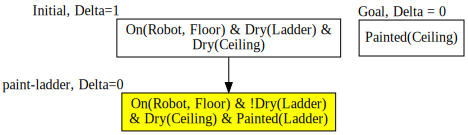

In [4]:
# Initial State
I1 = 'On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = 'Initial, Delta=1'

# Goal State
G1 = 'Painted(Ceiling)'
G2 = 'Goal, Delta = 0'

# Next State
N1 = 'On(Robot, Floor) & !Dry(Ladder) \n& Dry(Ceiling) & Painted(Ladder)'
N2 = 'paint-ladder, Delta=0'

G = """
digraph {{
    rankdir=TD
    A[shape="box",label="{0}", xlabel="{1}"]
    B[shape="box",label="{2}", xlabel="{3}"]
    C[shape="box",label="{4}", xlabel="{5}", style="filled", fillcolor="yellow"]
    A -> C
}}
""".replace('\n','').format(I1,I2,G1,G2,N1,N2)

gz.Source(G)

### Exercise

#### Step 1

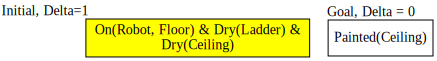

In [5]:
# Initial State
I1 = 'On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = 'Initial, Delta=1'

# Goal State
G1 = 'Painted(Ceiling)'
G2 = 'Goal, Delta = 0'

G = """
digraph {{
    rankdir=TD
    A[shape="box",label="{0}", xlabel="{1}", style="filled", fillcolor="yellow"]
    B[shape="box",label="{2}", xlabel="{3}"]
}}
""".replace('\n','').format(I1,I2,G1,G2,'','')

gz.Source(G)

**Current State**

| Current State | 
| --- |
| On(Robot, Floor) & Dry(Ladder) & Dry(Ceiling)

**Applicable Operators**

| Operator | Pre condition | Post Condition | Applicability 
| --- | --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) | yes 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) | no 
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) | no
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) | yes 

**Delta** for applicable operators

| Operator | Current State | Post Condition | Next State | Delta | 
| --- | --- | --- | --- | --- |
| climb-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling)| On(Robot, Ladder)| On(Robot, Ladder) & Dry(Ladder) <br>& Dry(Ceiling) | 1  
| paint-ladder |  On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling) | Painted(Ladder) & !Dry(Ladder) | On(Robot, Floor) & !Dry(Ladder) <br>& Dry(Ceiling) & Painted(Ladder) | 1

**But paint-ladder was already used in another sub goal. So only left out candidate is climb-ladder** 

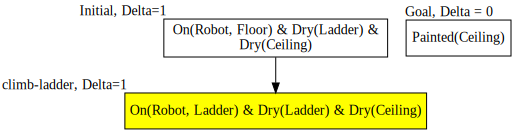

In [6]:
# Initial State
I1 = 'On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = 'Initial, Delta=1'

# Goal State
G1 = 'Painted(Ceiling)'
G2 = 'Goal, Delta = 0'

# Next State
N1 = 'On(Robot, Ladder) & Dry(Ladder) & Dry(Ceiling)'
N2 = 'climb-ladder, Delta=1'

G = """
digraph {{
    rankdir=TD
    A[shape="box",label="{0}", xlabel="{1}"]
    B[shape="box",label="{2}", xlabel="{3}"]
    C[shape="box",label="{4}", xlabel="{5}", style="filled", fillcolor="yellow"]
    A -> C
}}
""".replace('\n','').format(I1,I2,G1,G2,N1,N2)

gz.Source(G)

#### Step 2

**Current State**

| Current State | 
| --- |
| On(Robot, Ladder) & Dry(Ladder) & Dry(Ceiling)

**Applicable Operators**

| Operator | Pre condition | Post Condition | Applicability 
| --- | --- | --- | --- | 
| climb-ladder | On(Robot, Floor) & Dry(Ladder) | On(Robot, Ladder) | x 
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) | On(Robot, Floor) | $$\checkmark$$
| paint-ceiling | On(Robot, Ladder) | Painted(Ceiling) & !Dry(Ceiling) | $$\checkmark$$
| paint-ladder | On(Robot, Floor) | Painted(Ladder) & !Dry(Ladder) | x 

**Delta** for applicable operators

| Operator | Current State | Post Condition | Next State | Delta | 
| --- | --- | --- | --- | --- |
| descend-ladder | On(Robot, Ladder) & Dry(Ladder) <br>& Dry(Ceiling) | On(Robot, Floor) | On(Robot, Floor) & Dry(Ladder) <br>& Dry(Ceiling) | 1
| paint-ceiling | On(Robot, Ladder) & Dry(Ladder) <br>& Dry(Ceiling) | Painted(Ceiling) & !Dry(Ceiling) | On(Robot, Ladder) & Dry(Ladder) <br>& Painted(Ceiling) & !Dry(Ceiling) | 0

So here, ```paint-ceiling``` is next logical operator. Applying that, 

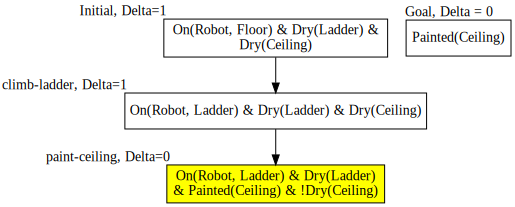

In [7]:
# Initial State
I1 = 'On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = 'Initial, Delta=1'

# Goal State
G1 = 'Painted(Ceiling)'
G2 = 'Goal, Delta = 0'

# Current State
C1 = 'On(Robot, Ladder) & Dry(Ladder) & Dry(Ceiling)'
C2 = 'climb-ladder, Delta=1'

# Next State
N1 = 'On(Robot, Ladder) & Dry(Ladder) \n& Painted(Ceiling) & !Dry(Ceiling)'
N2 = 'paint-ceiling, Delta=0'


G = """
digraph {{
    rankdir=TD
    A[shape="box",label="{0}", xlabel="{1}"]
    B[shape="box",label="{2}", xlabel="{3}"]
    C[shape="box",label="{4}", xlabel="{5}"]
    D[shape="box",label="{6}", xlabel="{7}", style="filled", fillcolor="yellow"]
    A -> C
    C -> D
}}
""".replace('\n','').format(I1,I2,G1,G2,C1,C2,N1,N2)

gz.Source(G)

## Detecting Conflicts

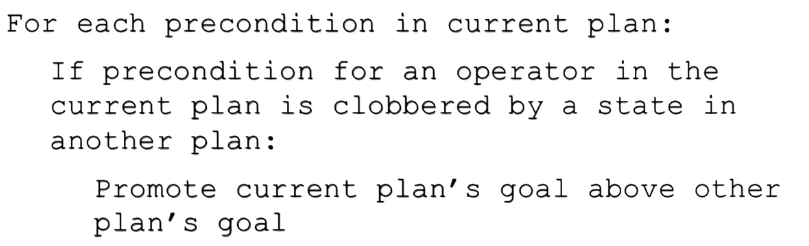

### List out pre conditions of operators

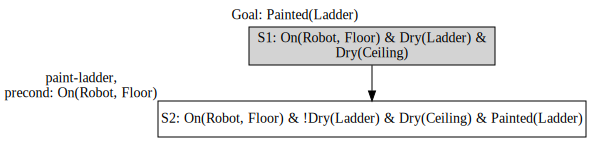

In [8]:
# Goal
G = 'Goal: Painted(Ladder)'

# Initial State
I1 = 'S1: On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = ''

# Current State
C1 = 'S2: On(Robot, Floor) & !Dry(Ladder) & Dry(Ceiling) & Painted(Ladder)'
C2 = 'paint-ladder, \nprecond: On(Robot, Floor)'


G = """
digraph {{
    rankdir=TD;label="{0}";labelloc=top;
    A[shape="box",label="{1}", xlabel="{2}",style="filled", fillcolor="lightgrey"]
    B[shape="box",label="{3}", xlabel="{4}"]
    A -> B
}}
""".replace('\n','').format(G,I1,I2,C1,C2,N1,N2)

gz.Source(G)

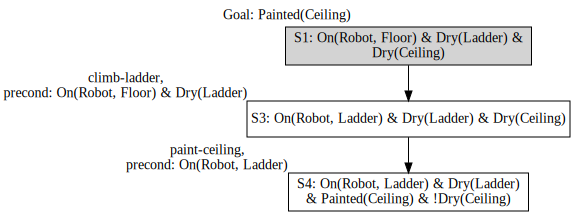

In [9]:
# Goal
G = 'Goal: Painted(Ceiling)'

# Initial State
I1 = 'S1: On(Robot, Floor) & Dry(Ladder) & \nDry(Ceiling)'
I2 = ''

# Current State
C1 = 'S3: On(Robot, Ladder) & Dry(Ladder) & Dry(Ceiling)'
C2 = 'climb-ladder, \nprecond: On(Robot, Floor) & Dry(Ladder)'

# Next State
N1 = 'S4: On(Robot, Ladder) & Dry(Ladder) \n& Painted(Ceiling) & !Dry(Ceiling)'
N2 = 'paint-ceiling, \nprecond: On(Robot, Ladder)'


G = """
digraph {{
    rankdir=TD;label="{0}";labelloc=top;
    A[shape="box",label="{1}", xlabel="{2}",style="filled", fillcolor="lightgrey"]
    B[shape="box",label="{3}", xlabel="{4}"]
    C[shape="box",label="{5}", xlabel="{6}"]
    A -> B
    B -> C
}}
""".replace('\n','').format(G,I1,I2,C1,C2,N1,N2)

gz.Source(G)

| Abbreviation | State |
| --- | --- |
| S1 | On(Robot, Floor) & Dry(Ladder) & Dry(Ceiling)
| S2 | On(Robot, Floor) & !Dry(Ladder) & Dry(Ceiling) & Painted(Ladder
| S3 | On(Robot, Ladder) & Dry(Ladder) & Dry(Ceiling)
| S4 | On(Robot, Ladder) & Dry(Ladder) & Painted(Ceiling) & !Dry(Ceiling)

**Finding conflicts:** shown by tick indicator. 

> For an operator in a plan/goal, find conflicts in other plan/goal. For eg, for paint-ladder, find in goal:Painting(ceiling) plan. 

| Operator | Pre condition | S1 |  S2 | S3 | S4 | 
| --- | --- | --- | --- | --- | --- |
|paint-ladder | On(Robot, Floor) | x | NA | x | x |
|climb-ladder | On(Robot, Floor) & Dry(Ladder) | x | $$\checkmark$$ | NA | NA |
|paint-ceiling | On(Robot, Ladder) | x | x | NA | NA |



> climb-ladder has Dry(Ladder) and S2 has !Dry(Ladder) which is a conflict. So prefer the goal first where climb-ladder was involved and then go for other goal.

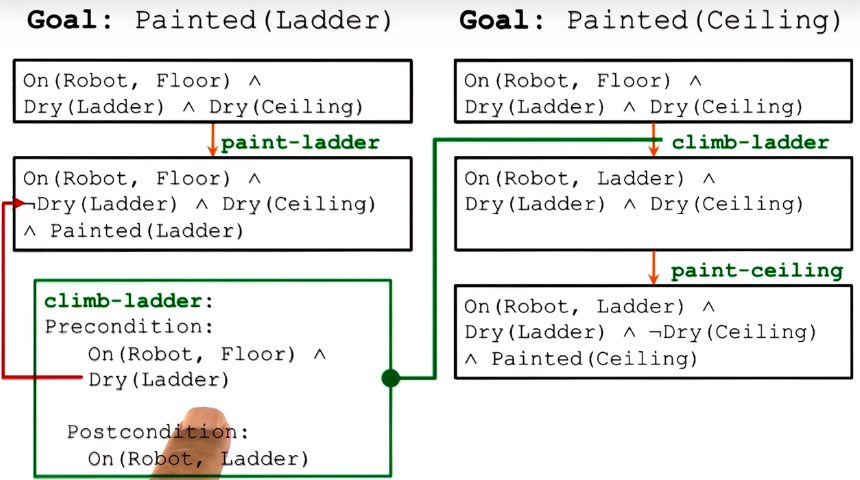

## Open Preconditions

Note S3 of Painted(Ceiling) the robot is on ladder, but S1 of Painted(Ladder) needs to have robot on floor. So there is a gap. Simply find from the remaining operators, which has the pre condition match with S3 of Painting(Ceiling) and post condition match with S1 of Painting(Ladder). Naturally its the descend-ladder

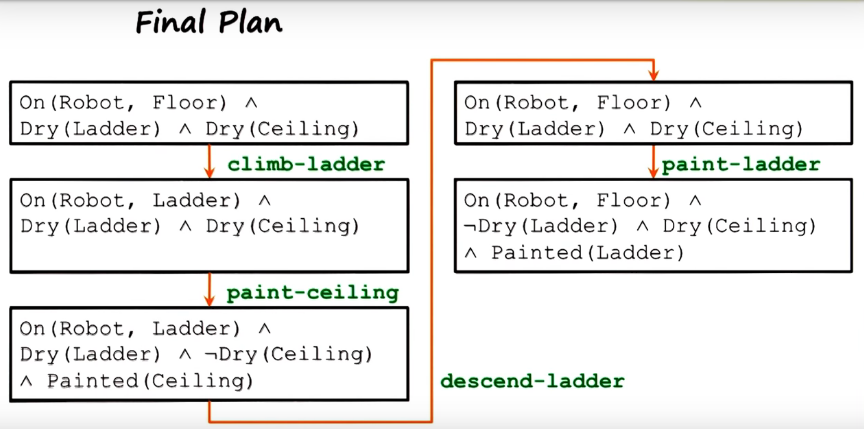

## Postulates

* Knowledge is not just about world. Its also control-knowledge to select between operators
* Goals provide control knowledge
* Partial Order planning as interaction between several smaller agent with simpler goals independently
* Society of Mind is an example

## Quiz: Partial Order Planning (POP) I

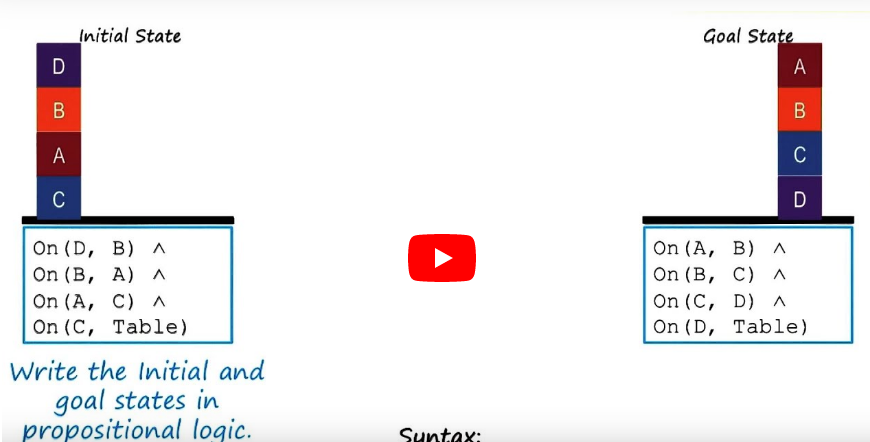

## Quiz: POP II

Note, in order to move an X or Y, both should not have anything on top of them. This can be indicated by ```clear(x)``` for example. 

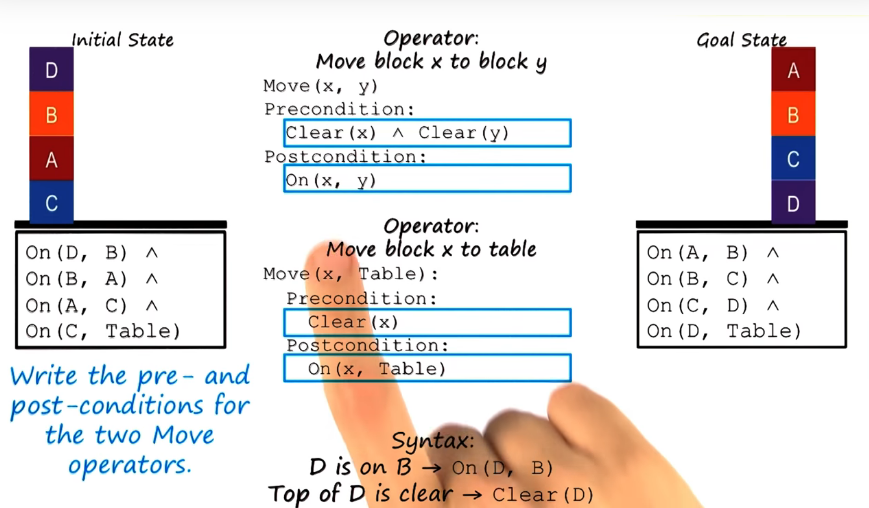

## Quiz: POP III

When they ask plans, write the operators list

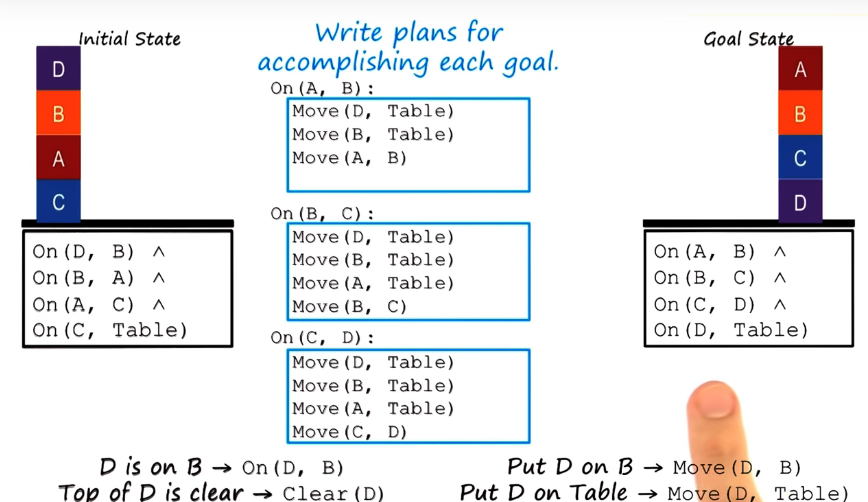

## Quiz: POP IV

### Find Conflicts

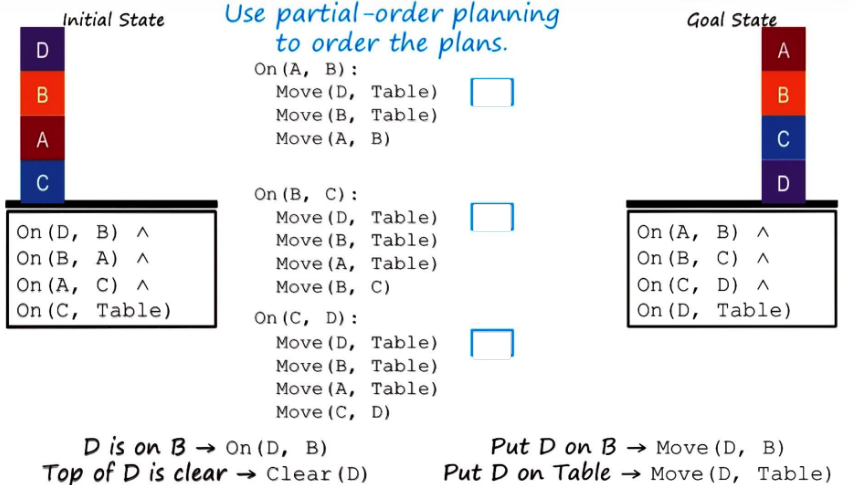

#### Goal: On(A,B)



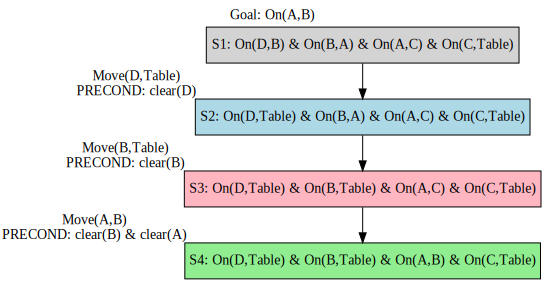

In [10]:
# Goal
G = 'Goal: On(A,B)'

# Initial State
I1 = 'S1: On(D,B) & On(B,A) & On(A,C) & On(C,Table)'
I2 = ''

# step 1: Move(D, Table)
C1 = 'S2: On(D,Table) & On(B,A) & On(A,C) & On(C,Table)'
C2 = 'Move(D,Table)\nPRECOND: clear(D)'

# step 2: Move(B, Table)
C3 = 'S3: On(D,Table) & On(B,Table) & On(A,C) & On(C,Table)'
C4 = 'Move(B,Table)\nPRECOND: clear(B)'

# step 3: Move(A,B)
C5 = 'S4: On(D,Table) & On(B,Table) & On(A,B) & On(C,Table)'
C6 = 'Move(A,B)\nPRECOND: clear(B) & clear(A)'


G = """
digraph {{
    rankdir=TD;label="{0}";labelloc=top;
    A[shape="box",label="{1}", xlabel="{2}",style="filled", fillcolor="lightgrey"]
    B[shape="box",label="{3}", xlabel="{4}",style="filled", fillcolor="lightblue"]
    C[shape="box",label="{5}", xlabel="{6}",style="filled", fillcolor="lightpink"]
    D[shape="box",label="{7}", xlabel="{8}",style="filled", fillcolor="lightgreen"]
    A -> B
    B -> C
    C -> D
}}
""".replace('\n','').format(G,I1,I2, C1, C2, C3, C4, C5, C6)

gz.Source(G)

#### Goal: On(B,C)

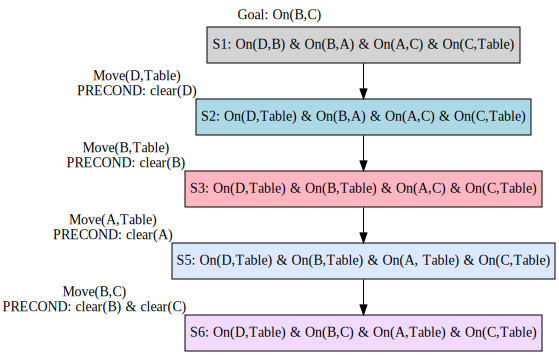

In [11]:
# Goal
G = 'Goal: On(B,C)'

# Initial State
I1 = 'S1: On(D,B) & On(B,A) & On(A,C) & On(C,Table)'
I2 = ''

# step 1: Move(D, Table)
C1 = 'S2: On(D,Table) & On(B,A) & On(A,C) & On(C,Table)'
C2 = 'Move(D,Table)\nPRECOND: clear(D)'

# step 2: Move(B, Table)
C3 = 'S3: On(D,Table) & On(B,Table) & On(A,C) & On(C,Table)'
C4 = 'Move(B,Table)\nPRECOND: clear(B)'

# step 3: Move(A, Table)
C5 = 'S5: On(D,Table) & On(B,Table) & On(A, Table) & On(C,Table)'
C6 = 'Move(A,Table)\nPRECOND: clear(A)'

# step 4: Move(B, C)
C7 = 'S6: On(D,Table) & On(B,C) & On(A,Table) & On(C,Table)'
C8 = 'Move(B,C)\nPRECOND: clear(B) & clear(C)'

G = """
digraph {{
    rankdir=TD;label="{0}";labelloc=top;
    A[shape="box",label="{1}", xlabel="{2}",style="filled", fillcolor="lightgrey"]
    B[shape="box",label="{3}", xlabel="{4}",style="filled", fillcolor="lightblue"]
    C[shape="box",label="{5}", xlabel="{6}",style="filled", fillcolor="lightpink"]
    D[shape="box",label="{7}", xlabel="{8}",style="filled", fillcolor="#dbe8ff"]
    E[shape="box",label="{9}", xlabel="{10}",style="filled", fillcolor="#f0dbff"]
    A -> B
    B -> C
    C -> D
    D -> E
}}
""".replace('\n','').format(G,I1,I2, C1, C2, C3, C4, C5, C6, C7, C8)

gz.Source(G)

#### Goal: On(C,D)

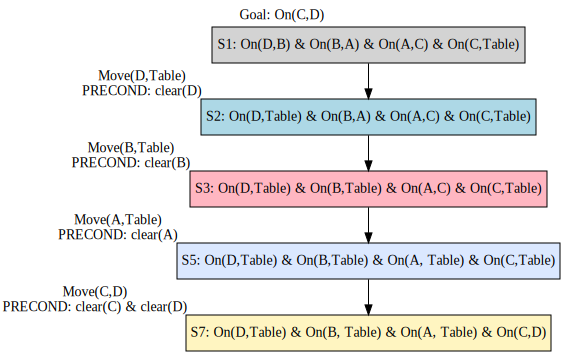

In [12]:
# Goal
G = 'Goal: On(C,D)'

# Initial State
I1 = 'S1: On(D,B) & On(B,A) & On(A,C) & On(C,Table)'
I2 = ''

# step 1: Move(D, Table)
C1 = 'S2: On(D,Table) & On(B,A) & On(A,C) & On(C,Table)'
C2 = 'Move(D,Table)\nPRECOND: clear(D)'

# step 2: Move(B, Table)
C3 = 'S3: On(D,Table) & On(B,Table) & On(A,C) & On(C,Table)'
C4 = 'Move(B,Table)\nPRECOND: clear(B)'

# step 3: Move(A, Table)
C5 = 'S5: On(D,Table) & On(B,Table) & On(A, Table) & On(C,Table)'
C6 = 'Move(A,Table)\nPRECOND: clear(A)'

# step 4: Move(C,D)
C7 = 'S7: On(D,Table) & On(B, Table) & On(A, Table) & On(C,D)'
C8 = 'Move(C,D)\nPRECOND: clear(C) & clear(D)'

G = """
digraph {{
    rankdir=TD;label="{0}";labelloc=top;
    A[shape="box",label="{1}", xlabel="{2}",style="filled", fillcolor="lightgrey"]
    B[shape="box",label="{3}", xlabel="{4}",style="filled", fillcolor="lightblue"]
    C[shape="box",label="{5}", xlabel="{6}",style="filled", fillcolor="lightpink"]
    D[shape="box",label="{7}", xlabel="{8}",style="filled", fillcolor="#dbe8ff"]
    E[shape="box",label="{9}", xlabel="{10}",style="filled", fillcolor="#fff5c1"]
    A -> B
    B -> C
    C -> D
    D -> E
}}
""".replace('\n','').format(G,I1,I2, C1, C2, C3, C4, C5, C6, C7, C8)

gz.Source(G)

$$
\newcommand{\ch}{\checkmark}
$$

Since S1, S2, S3 are common for all plans, we could ignore them for a moment. 

| Abbreviation | State | Goal:On(A,B) | Goal:On(B,C) | Goal:On(C,D) |
| --- | --- | --- | --- | --- |
| S4 | On(D,Table) & On(B,Table) & On(A,B) & On(C,Table) | $\ch$ | x | x |
| S5 | On(D,Table) & On(B,Table) & On(A, Table) & On(C,Table) | x | $\ch$ | $\ch$ |
| S6 | On(D,Table) & On(B,C) & On(A,Table) & On(C,Table) | x | $\ch$ | x |
| S7 | On(D,Table) & On(B, Table) & On(A, Table) & On(C,D) | x | x | $\ch$ |

#### Finding conflicts: 
as shown by tick indicator. For an operator in a plan/goal, find conflicts in other plans/goals. First let us identify where we need to check for conflicts, indicated by ?. 

We could ignore all operators that are common for all plans also, for a moment, 

| Operator | Pre condition | S4 | S5 | S6 | S7 
| --- | --- | --- |  --- |  --- |  --- |
| Move(A,Table) | Clear(A) | ? | _ | _ | _ |
| Move(A,B) | Clear(A) & Clear(B) | _ | ? | ? | ? |
| Move(B,C) | Clear(B) & Clear(C) | ? | _ | _ | ? |
| Move(C,D) | Clear(C) & Clear(D) | ? | ? | ? | _ |

Now marking the conflict by respective condition, and no conflict by x

| Operator | Pre condition | S4 | S5 | S6 | S7 
| --- | --- | --- |  --- |  --- |  --- |
| Move(A,Table) | Clear(A) | x | _ | _ | _ |
| Move(A,B) | Clear(A) & Clear(B) | _ | x | x | x |
| Move(B,C) | Clear(B) & Clear(C) | On(A,B) | _ | _ | x |
| Move(C,D) | Clear(C) & Clear(D) | x | x | On(B,C) | _ |

Above table illustrates

* Move(C,D) of Goal:On(C,D) is clobbered by On(B,C) from S6 belonging to Goal:On(B,C)
* Move(B,C) of Goal:On(B,C) is clobbered by On(A,B) from S4 belonging to Goal:On(A,B) 

#### Conclusion

So 

* Prefer Goal:On(C,D) over Goal:On(B,C)
* Prefer Goal:On(B,C) over Goal:On(A,B)

This implies, the order

* Goal:On(C,D)
* Goal:On(B,C)
* Goal:On(A,B)

## Quiz: POP V

Combining above Goals in order we get, 

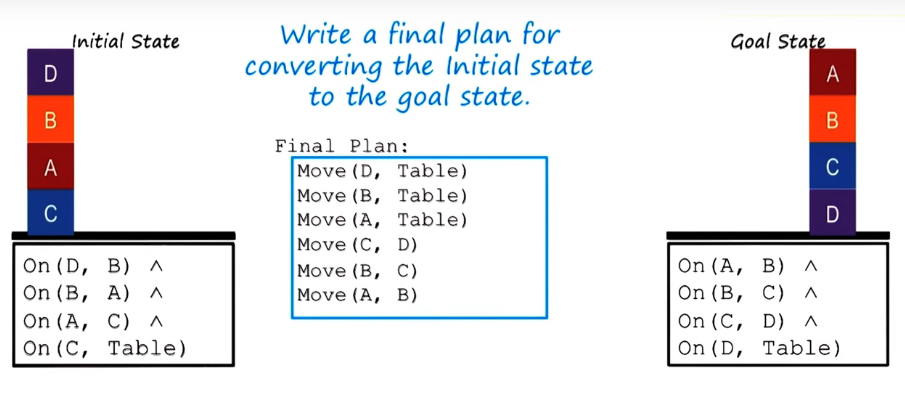

## Hierarchical Decomposition

Decompose, abstract 

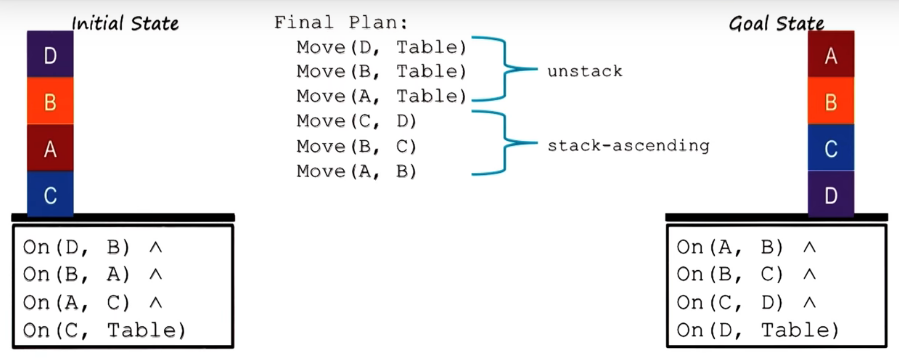

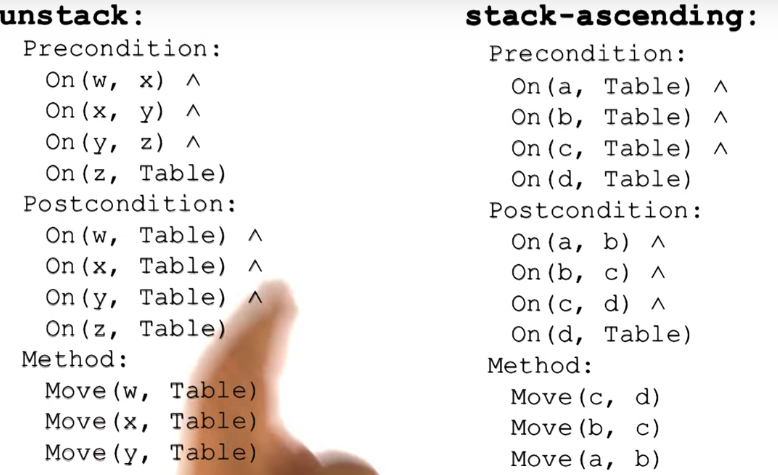

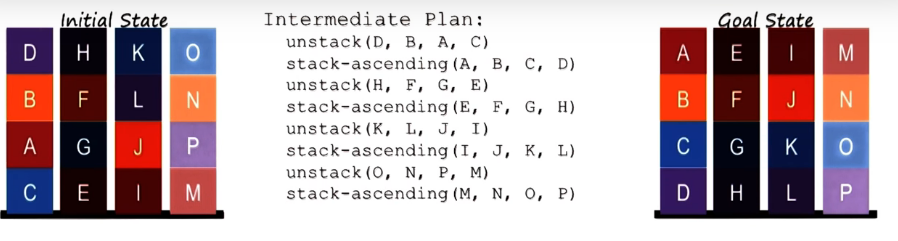